### AqPy Example

This tutorial solves the following problem:

Model a 2-D, confined aquifer under steady state conditions. Use an 8 x 8 grid representation with $\Delta x = \Delta y= 500$ft.  Assume the transmissivity to be normally distributed with a mean at $12 500 \text{ft}^2\text{d}^{-1}$ and standard deviation of $100 \text{ft}^2\text{d}^{-1}$, and a constant-head boundary condition at $39 \text{ft}$ at the upstream boundary, and $29.4 \text{ft}$ at the downstream boundary. In all scenarios the head at any location cannot be less than $23 \text{ft}$. Assume no-flow conditions along the top and bottom boundaries. Potential pumping well sites are located at cells $(3,3), (5,5), \text{ and } (7,7)$. Maximize pumping from the aquifer.


To begin, import the module

In [1]:
from aqpy import aq

Now that the module is imported, we need to create the grid.

In [3]:
g = aq.Grid(8, 8)

Academic license - for non-commercial use only


Now the aquifer attributes will be added

In [4]:
g.add_units('ft', 'd')
g.add_wells( [(3,3),(5,5),(7,7)] )
g.add_min_head(23)
g.add_cell_lengths(500)
g.add_trans(12500, 100, 'normal')
g.add_boundary_heads(left=39, right=29.4)

Next, the objective function is selected and the model is optimized.

In [5]:
g.add_objective(1)
g.optimize()

Optimize a model with 64 rows, 67 columns and 291 nonzeros
Coefficient statistics:
  Matrix range     [5e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [2e+01, 2e+01]
  RHS range        [1e+00, 2e+00]
Presolve removed 37 rows and 37 columns
Presolve time: 0.01s
Presolved: 27 rows, 30 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8528803e+30   2.591038e+31   3.852880e+00      0s
      26    2.0077123e+00   0.000000e+00   0.000000e+00      0s

Solved in 26 iterations and 0.01 seconds
Optimal objective  2.007712256e+00
OPTIMIZATION COMPLETE


The results are printed using a few methods. Each of these methods also prints results to file. `print_grid_results` will produce a `csv` file, `print_pump_results` will produce a `txt` file, and `print_map` will generate a `pdf` file. 

To see the numerical head values, use the following.

In [6]:
g.print_grid_results()

Results: in ft
[[ bound  bound  bound  bound  bound  bound  bound  bound  bound  bound]
 [39.000 35.290 31.821 29.069 27.854 27.499 27.636 28.076 28.694 29.400]
 [39.000 35.047 31.106 27.540 27.002 27.008 27.334 27.893 28.606 29.400]
 [39.000 34.793 30.022 23.000 25.608 26.198 26.801 27.553 28.438 29.400]
 [39.000 35.115 31.146 27.324 26.191 25.374 26.124 27.077 28.193 29.400]
 [39.000 35.523 32.121 28.990 26.464 23.000 25.246 26.438 27.856 29.400]
 [39.000 35.859 32.829 30.050 27.668 25.685 25.437 25.569 27.392 29.400]
 [39.000 36.085 33.283 30.713 28.476 26.639 25.248 23.000 26.744 29.400]
 [39.000 36.197 33.506 31.035 28.885 27.148 25.918 25.353 27.171 29.400]
 [ bound  bound  bound  bound  bound  bound  bound  bound  bound  bound]]


We can also print a summary of the pumping results.

In [7]:
g.print_pump_results()

Pump Results
(3, 3):    0.92785 fpd, head (ft):  23.00
(5, 5):    0.53438 fpd, head (ft):  23.00
(7, 7):    0.54549 fpd, head (ft):  23.00
Total Flow (q): 2.01 fpd
Total Flow (W): 501928.06 cfd


And finally, a heat map can be printed to visualize the heads and locations of wells.

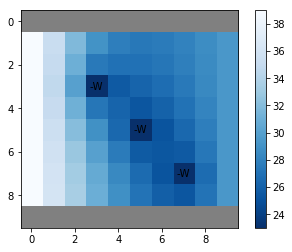

In [8]:
g.print_map()